In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 6
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.8
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[6_10_51_300_0.8_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[6_10_51_300_0.8_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.1414

Best Fitness:	600.0784
Solution:	600.0000
Diff:		0.0784

[0:10:44][----------] 1.96% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	601.1893

Best Fitness:	601.1271
Solution:	600.0000
Diff:		1.1271

[0:20:55][----------] 3.92% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.2722

Best Fitness:	600.1642
Solution:	600.0000
Diff:		0.1642

[0:31:08][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.1964

Best Fitness:	600.1203
Solution:	600.0000
Diff:		0.1203

[0:40:39][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.1943

Best Fitness:	600.1299
Solution:	600.0000
Diff:		0.1299

[0:48:52][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.1313

Best Fitness:	600.0686
Solution:	600.0000
Diff:		0.0686

[0:57:16][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.1080

Best Fitness:	600.0656
Solution:	600.0000
Diff:		0.0656

[1:05:42][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.1427

Best Fitness:	600.0871
Solution:	600.0000
Diff:		0.0871

[1:14:25][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.1438

Best Fitness:	600.0947
Solution:	600.0000
Diff:		0.0947

[1:22:49][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.1330

Best Fitness:	600.0861
Solution:	600.0000
Diff:		0.0861

[1:31:17][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.1764

Best Fitness:	600.1151
Solution:	600.0000
Diff:		0.1151

[1:38:50][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.1625

Best Fitness:	600.0813
Solution:	600.0000
Diff:		0.0813

[1:45:50][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.2273

Best Fitness:	600.1094
Solution:	600.0000
Diff:		0.1094

[1:52:59][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.1869

Best Fitness:	600.1123
Solution:	600.0000
Diff:		0.1123

[2:00:29][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.1761

Best Fitness:	600.1220
Solution:	600.0000
Diff:		0.1220

[2:07:29][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.1919

Best Fitness:	600.1000
Solution:	600.0000
Diff:		0.1000

[2:14:45][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.2413

Best Fitness:	600.1656
Solution:	600.0000
Diff:		0.1656

[2:22:20][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	601.2043

Best Fitness:	601.0784
Solution:	600.0000
Diff:		1.0784

[2:28:39][####------] 35.29% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.1107

Best Fitness:	600.0723
Solution:	600.0000
Diff:		0.0723

[2:35:02][####------] 37.25% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.0844

Best Fitness:	600.0452
Solution:	600.0000
Diff:		0.0452

[2:41:27][####------] 39.22% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.1663

Best Fitness:	600.1095
Solution:	600.0000
Diff:		0.1095

[2:47:41][####------] 41.18% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.1063

Best Fitness:	600.0649
Solution:	600.0000
Diff:		0.0649

[2:53:56][####------] 43.14% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.0699

Best Fitness:	600.0508
Solution:	600.0000
Diff:		0.0508

[3:00:11][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.1883

Best Fitness:	600.1186
Solution:	600.0000
Diff:		0.1186

[3:06:27][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.1977

Best Fitness:	600.1310
Solution:	600.0000
Diff:		0.1310

[3:11:58][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.1036

Best Fitness:	600.0666
Solution:	600.0000
Diff:		0.0666

[3:17:21][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.1274

Best Fitness:	600.0777
Solution:	600.0000
Diff:		0.0777

[3:22:39][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.1509

Best Fitness:	600.0998
Solution:	600.0000
Diff:		0.0998

[3:27:52][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.2145

Best Fitness:	600.1424
Solution:	600.0000
Diff:		0.1424

[3:33:16][######----] 56.86% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.1053

Best Fitness:	600.0562
Solution:	600.0000
Diff:		0.0562

[3:38:42][######----] 58.82% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.1374

Best Fitness:	600.0787
Solution:	600.0000
Diff:		0.0787

[3:43:49][######----] 60.78% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.2124

Best Fitness:	600.1287
Solution:	600.0000
Diff:		0.1287

[3:48:24][######----] 62.75% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	601.3933

Best Fitness:	601.2075
Solution:	600.0000
Diff:		1.2075

[3:52:51][######----] 64.71% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.1337

Best Fitness:	600.0876
Solution:	600.0000
Diff:		0.0876

[3:57:22][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.0997

Best Fitness:	600.0668
Solution:	600.0000
Diff:		0.0668

[4:01:46][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.1130

Best Fitness:	600.0633
Solution:	600.0000
Diff:		0.0633

[4:06:11][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.1881

Best Fitness:	600.1100
Solution:	600.0000
Diff:		0.1100

[4:10:34][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.2364

Best Fitness:	600.1341
Solution:	600.0000
Diff:		0.1341

[4:14:20][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.1313

Best Fitness:	600.0859
Solution:	600.0000
Diff:		0.0859

[4:17:54][########--] 76.47% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.1219

Best Fitness:	600.0858
Solution:	600.0000
Diff:		0.0858

[4:21:27][########--] 78.43% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.1398

Best Fitness:	600.0813
Solution:	600.0000
Diff:		0.0813

[4:25:00][########--] 80.39% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.1714

Best Fitness:	600.1046
Solution:	600.0000
Diff:		0.1046

[4:28:35][########--] 82.35% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.1315

Best Fitness:	600.0868
Solution:	600.0000
Diff:		0.0868

[4:32:18][########--] 84.31% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.2871

Best Fitness:	600.2043
Solution:	600.0000
Diff:		0.2043

[4:35:44][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.2042

Best Fitness:	600.1373
Solution:	600.0000
Diff:		0.1373

[4:38:43][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.0984

Best Fitness:	600.0597
Solution:	600.0000
Diff:		0.0597

[4:41:28][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.1580

Best Fitness:	600.1010
Solution:	600.0000
Diff:		0.1010

[4:44:13][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.1156

Best Fitness:	600.0766
Solution:	600.0000
Diff:		0.0766

[4:46:57][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.1669

Best Fitness:	600.1068
Solution:	600.0000
Diff:		0.1068

[4:49:41][##########] 96.08% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.2203

Best Fitness:	600.1353
Solution:	600.0000
Diff:		0.1353

[4:52:23][##########] 98.04% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	600.1655

Best Fitness:	600.1116
Solution:	600.0000
Diff:		0.1116

[4:54:58][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

4:54:58

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
259,0.19211,0.166624,0.204799,0.184297,0.184183,0.200630,0.204373,0.170506,0.14758,0.165222,...,0.190311,0.195572,0.214084,0.200364,0.181286,0.171075,0.191528,0.147986,0.206468,50
260,0.19211,0.166624,0.176837,0.184297,0.184183,0.200630,0.204373,0.170506,0.14758,0.165222,...,0.190311,0.195572,0.214084,0.200364,0.181286,0.171075,0.191528,0.147986,0.206468,50
261,0.19211,0.166624,0.152497,0.184297,0.184183,0.200630,0.204373,0.170506,0.14758,0.165222,...,0.183770,0.195572,0.122373,0.200364,0.181286,0.171075,0.140583,0.147986,0.206468,50
262,0.19211,0.166624,0.152497,0.184297,0.184183,0.168893,0.204373,0.170506,0.14758,0.165222,...,0.183770,0.195572,0.122373,0.200364,0.181286,0.171075,0.140583,0.147986,0.206468,50
263,0.19211,0.166624,0.152497,0.184297,0.184183,0.168893,0.191209,0.170506,0.14758,0.165222,...,0.183770,0.195572,0.122373,0.200364,0.176755,0.171075,0.140583,0.147986,0.206468,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 0.07836835472517123

Best error for run 1: 1.1271318713922938

Best error for run 2: 0.1642260324478002

Best error for run 3: 0.12030770748629038

Best error for run 4: 0.12989545524999357

Best error for run 5: 0.0686201525843444

Best error for run 6: 0.06563017387759373

Best error for run 7: 0.08714017848240019

Best error for run 8: 0.09470406531659137

Best error for run 9: 0.08607115704705848

Best error for run 10: 0.115082661439601

Best error for run 11: 0.08131155597084216

Best error for run 12: 0.1093708428396667

Best error for run 13: 0.1123164272565873

Best error for run 14: 0.12201236599844378

Best error for run 15: 0.10001454308257962

Best error for run 16: 0.1656058548908277

Best error for run 17: 1.0784131345192236

Best error for run 18: 0.07230309154135739

Best error for run 19: 0.04522947581801873

Best error for run 20: 0.10945707172675156

Best error for run 21: 0.06490645597784805

Best error for run 22: 0.0508038892071454

Best error for run 23: 0.118593560035265

Best error for run 24: 0.13103353689245978

Best error for run 25: 0.06657842535582859

Best error for run 26: 0.07770049473708696

Best error for run 27: 0.09975308618311374

Best error for run 28: 0.1424095247881496

Best error for run 29: 0.05620881853519677

Best error for run 30: 0.07872421338777258

Best error for run 31: 0.12870168536062465

Best error for run 32: 1.2074698232909213

Best error for run 33: 0.08755693401997178

Best error for run 34: 0.06681111344687451

Best error for run 35: 0.06329502865105496

Best error for run 36: 0.10995120882830633

Best error for run 37: 0.13406869374136932

Best error for run 38: 0.08585941006367648

Best error for run 39: 0.08579688879092373

Best error for run 40: 0.08133730696408747

Best error for run 41: 0.10461789787689213

Best error for run 42: 0.08680627329511026

Best error for run 43: 0.20430217625710156

Best error for run 44: 0.13733781875521345

Best error for run 45: 0.05966947502452058

Best error for run 46: 0.10104956211330318

Best error for run 47: 0.07658524071018746

Best error for run 48: 0.10681949286072268

Best error for run 49: 0.13525420276960176

Best error for run 50: 0.11157412231602848

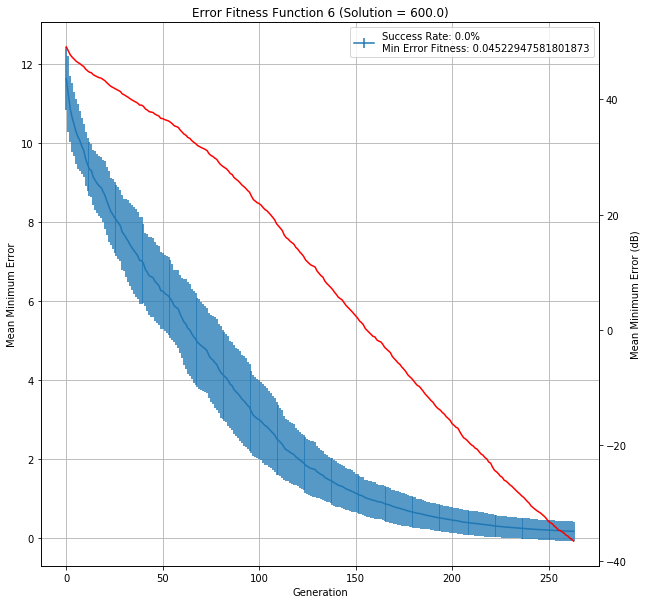

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[6_10_51_300_0.8_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,6,10,0.8,0.078368,1.127132,0.164226,0.120308,0.129895,0.06862,...,0.137338,0.059669,0.10105,0.076585,0.106819,0.135254,0.111574,0.160682,4:54:58,79800
